# Data Visualization

In [347]:
%matplotlib inline

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [349]:
df = pd.read_csv("building_inventory.csv")

In [350]:
df.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


In [351]:
df = pd.read_csv("building_inventory.csv", na_values = {
    "Year Acquired":0,
    "Year Constructed":0,
    "Square Footage":0
})

## 1. Relationship between the year acquired and the year constructed

I use a scatter plot to show the relationship between the year acquired and the year constructed. This scatter plot shows that lots of buildings are acquired and constructed near the same year nearly around 1950-2000. However, you can see lots of dots are overlapping each other. It is hard to specify which year or how many dots are in this chart. In conclusion, this scatter plot can still perform the relationship between year acquired and year constructed really well.

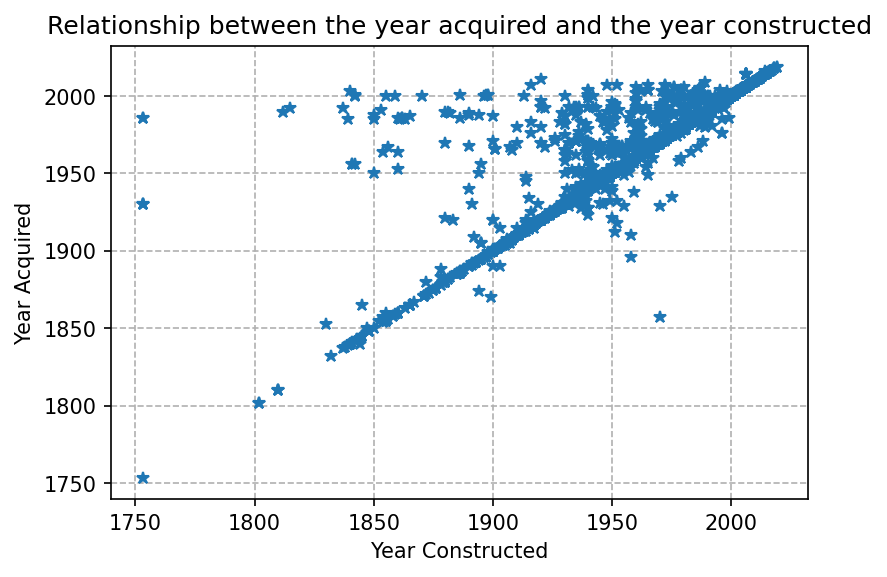

In [393]:
plt.figure(dpi=150)
plt.plot(df["Year Constructed"],df["Year Acquired"],'*')
plt.xlabel("Year Constructed")
plt.ylabel("Year Acquired")
plt.title("Relationship between the year acquired and the year constructed")
plt.grid(linestyle='--')

## 2. Total square footage as a function of congressional district

In this question, I use a bar chart to perform the total square footage of every congress district. At first, I show every congress district in this dataframe. Second, I calculate the total square footage for all congress district. And I organize the data to put it in bar chart to show every congress district's square footage.

In [353]:
# check unique number of congress district
df["Congress Dist"].unique()

array([17, 15, 16, 18, 11, 12,  3, 13,  6,  0, 14,  7,  8,  9,  2,  1, 10,
        5,  4])

In [354]:
df_by_dist = df.groupby("Congress Dist")

In [355]:
# store in new parameter and set index for this dataframe
df_by_dist_form = df_by_dist["Square Footage"].sum().reset_index()
df_by_dist_form

,Congress Dist,Square Footage
0,0,793124.0
1,1,2351762.0
2,2,6285684.0
3,3,1293687.0
4,4,317741.0
5,5,1809022.0
6,6,145659.0
7,7,9211651.0
8,8,1461548.0
9,9,77978.0


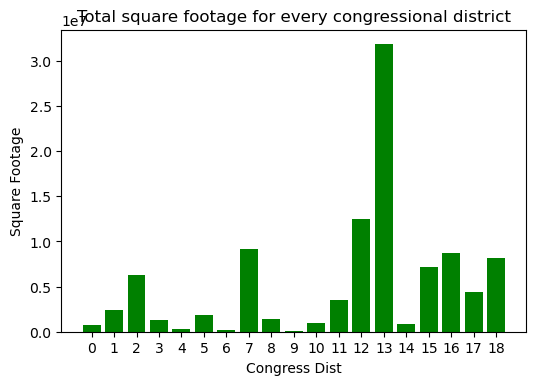

In [394]:
plt.figure(dpi=100)
plt.bar(df_by_dist_form["Congress Dist"].astype(str), df_by_dist_form["Square Footage"], color ='green',
        width = 0.8)

plt.xlabel("Congress Dist")
plt.ylabel("Square Footage")
plt.title("Total square footage for every congressional district")
plt.show()

## 3. Average square footage per floor as a function of congressional district

In this question, I calculate the total floor of every congress district. And use total square footage from the previous question to divide total floors to calculate average square footage per floor. To visualize this dataset, I use bar graph to perform this data frame. It is easy to see which district has higher average square footage.

In [357]:
# calculate every districts' total floors
df_by_dist["Total Floors"].sum()

Congress Dist
0      216
1      134
2      647
3       72
4       21
5      113
6       28
7      517
8      312
9       11
10     213
11     411
12    2339
13    2896
14     319
15    1872
16    1654
17     924
18    1800
Name: Total Floors, dtype: int64

In [358]:
df_by_new2 = df.groupby("Congress Dist").agg(Sum_footage = ("Square Footage",'sum'),Sum_floor= ("Total Floors",'sum')).reset_index()

In [359]:
df_by_new2

,Congress Dist,Sum_footage,Sum_floor
0,0,793124.0,216
1,1,2351762.0,134
2,2,6285684.0,647
3,3,1293687.0,72
4,4,317741.0,21
5,5,1809022.0,113
6,6,145659.0,28
7,7,9211651.0,517
8,8,1461548.0,312
9,9,77978.0,11


In [360]:
df_by_new2["Average_sq_floor"]= df_by_new2["Sum_footage"]/df_by_new2["Sum_floor"]
df_by_new2

,Congress Dist,Sum_footage,Sum_floor,Average_sq_floor
0,0,793124.0,216,3671.870370
1,1,2351762.0,134,17550.462687
2,2,6285684.0,647,9715.122102
3,3,1293687.0,72,17967.875000
4,4,317741.0,21,15130.523810
5,5,1809022.0,113,16009.044248
6,6,145659.0,28,5202.107143
7,7,9211651.0,517,17817.506770
8,8,1461548.0,312,4684.448718
9,9,77978.0,11,7088.909091


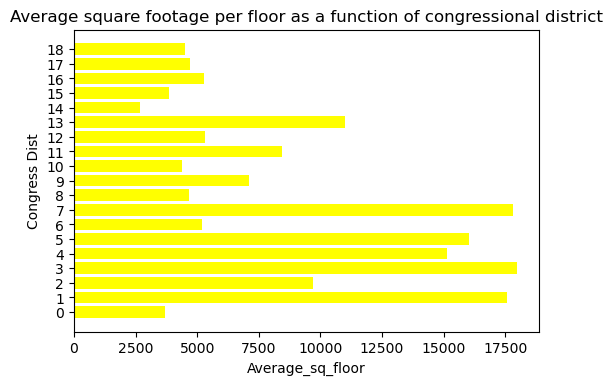

In [395]:
plt.figure(dpi=100)
plt.barh(df_by_new2["Congress Dist"].astype(str),df_by_new2["Average_sq_floor"], color='yellow')
plt.xlabel("Average_sq_floor")
plt.ylabel("Congress Dist")
plt.title("Average square footage per floor as a function of congressional district")
plt.show()

## 4. Square footage for the five most common departments as a function of year

In the first step, I pull out all the agency names from the data. And calculate the size of each agency name. Because it only asks for five most common departments in the data, therefore, I use nlargest function to take the top 5 most common agency names. Then, I use scatter plot for this question because I think scatter plot can perform the question well. The advantage of scatter plot is that it is easy to show single dot and its distribution in this graph. Because when I place five different agencies together and find out dots are overlapping each other. As a result, I create scatter plot for each agency and dots will be clear.

In [362]:
df["Agency Name"].unique()

array(['Department of Natural Resources', 'Department of Corrections',
       'Department of Human Services', 'Department of Transportation',
       'Department of State Police', 'Department of Military Affairs',
       'Department of Agriculture', 'Governors State University',
       'Department of Central Management Services',
       'Illinois State University', 'Historic Preservation Agency',
       'Department of Juvenile Justice', 'Southern Illinois University',
       'Illinois Medical District Commission', 'University of Illinois',
       "Department of Veterans' Affairs", 'Chicago State University',
       'Northern Illinois University', 'Office of the Secretary of State',
       'Illinois Emergency Management Agency',
       'Western Illinois University', 'Eastern Illinois University',
       'Northeastern Illinois University',
       'Illinois Community College Board',
       'Illinois Board of Higher Education',
       'IL State Board of Education', 'Department of Revenue',


In [363]:
df_by_agency = df.groupby("Agency Name")

In [364]:
df_by_agency2 = df.groupby("Agency Name").agg(Total_Agency = ("Agency Name",'size')).reset_index()
df_by_agency2

,Agency Name,Total_Agency
0,Appellate Court / Fifth District,1
1,Appellate Court / Fourth District,1
2,Appellate Court / Second District,1
3,Appellate Court / Third District,2
4,Chicago State University,16
5,Department of Agriculture,228
6,Department of Central Management Services,60
7,Department of Corrections,1428
8,Department of Human Services,617
9,Department of Juvenile Justice,120


In [365]:
df_by_agency2.nlargest(5, "Total_Agency")

,Agency Name,Total_Agency
11,Department of Natural Resources,3223
7,Department of Corrections,1428
15,Department of Transportation,1137
8,Department of Human Services,617
33,University of Illinois,525


In [366]:
#new2 = df.loc[df["Agency Name"].isin(['Department of Natural Resources','Department of Corrections','Department of Transportation','Department of Human Services','University of Illinois'])]
agency1 = df.loc[df["Agency Name"]=="Department of Natural Resources"]
agency2 = df.loc[df["Agency Name"]=="Department of Corrections"]
agency3 = df.loc[df["Agency Name"]=="Department of Transportation"]
agency4 = df.loc[df["Agency Name"]=="Department of Human Services"]
agency5 = df.loc[df["Agency Name"]=="University of Illinois"]

In [380]:
agency_new1 = agency1.sort_values(by=['Year Acquired'])
agency_new2 = agency2.sort_values(by=['Year Acquired'])
agency_new3 = agency3.sort_values(by=['Year Acquired'])
agency_new4 = agency4.sort_values(by=['Year Acquired'])
agency_new5 = agency5.sort_values(by=['Year Acquired'])

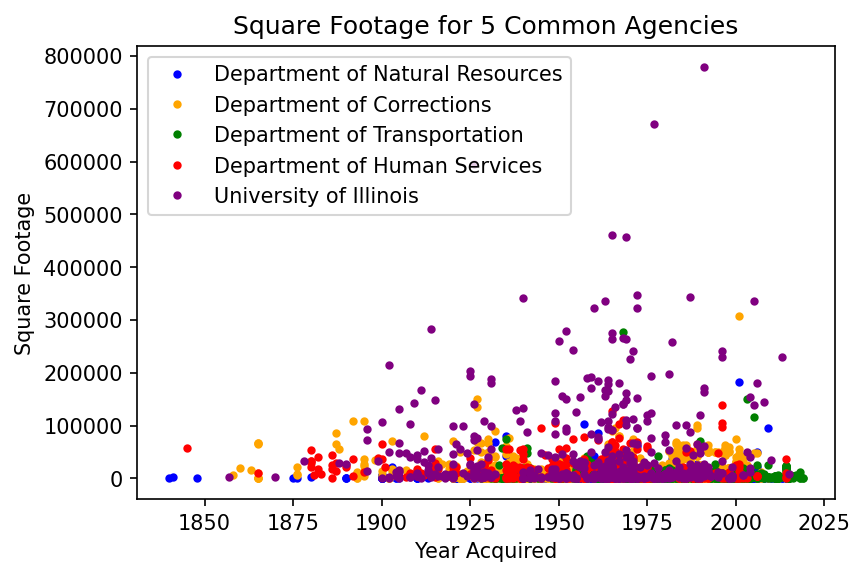

In [382]:
plt.figure(dpi=150)
plt.plot(agency_new1["Year Acquired"],agency_new1["Square Footage"],'.',color='blue',label ="Department of Natural Resources")
plt.plot(agency_new2["Year Acquired"],agency_new2["Square Footage"],'.',color='orange',label ="Department of Corrections")
plt.plot(agency_new3["Year Acquired"],agency_new3["Square Footage"],'.',color='green',label ="Department of Transportation")
plt.plot(agency_new4["Year Acquired"],agency_new4["Square Footage"],'.',color='red',label ="Department of Human Services")
plt.plot(agency_new5["Year Acquired"],agency_new5["Square Footage"],'.',color='purple',label ="University of Illinois")

plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.title("Square Footage for 5 Common Agencies")
plt.legend()
plt.show()

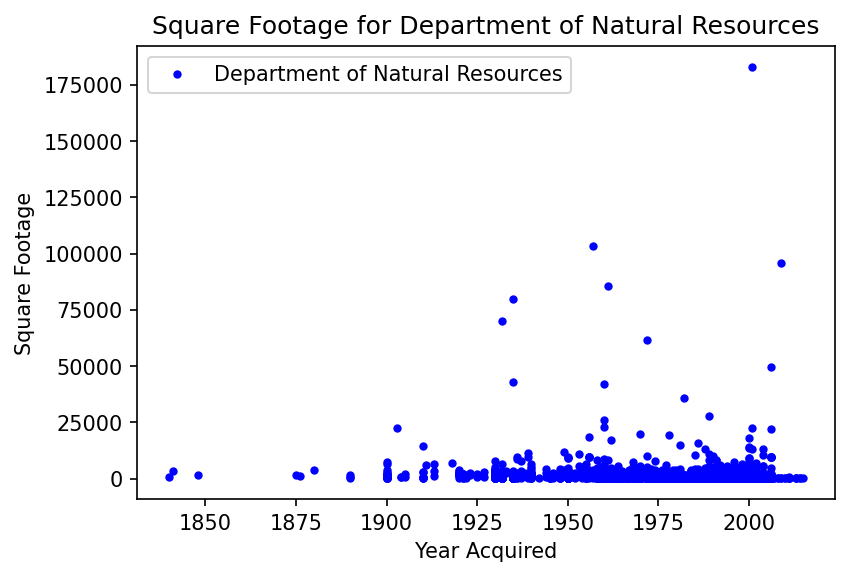

In [388]:
plt.figure(dpi=150)
plt.plot(agency_new1["Year Acquired"],agency_new1["Square Footage"],'.',color='blue',label ="Department of Natural Resources")

plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.title("Square Footage for Department of Natural Resources")
plt.legend()
plt.show()

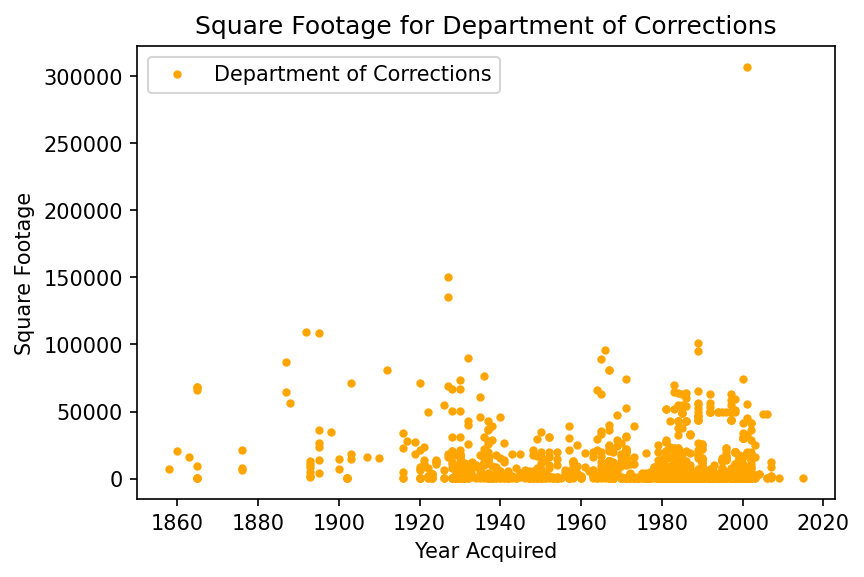

In [390]:
plt.figure(dpi=150)
plt.plot(agency_new2["Year Acquired"],agency_new2["Square Footage"],'.',color='orange',label ="Department of Corrections")
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.title("Square Footage for Department of Corrections")
plt.legend()
plt.show()

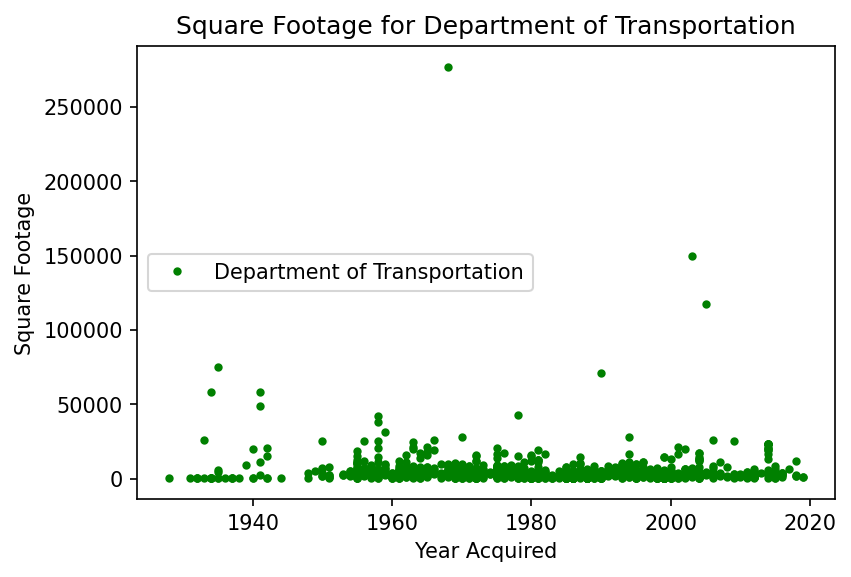

In [391]:
plt.figure(dpi=150)
plt.plot(agency_new3["Year Acquired"],agency_new3["Square Footage"],'.',color='green',label ="Department of Transportation")

plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.title("Square Footage for Department of Transportation")
plt.legend()
plt.show()

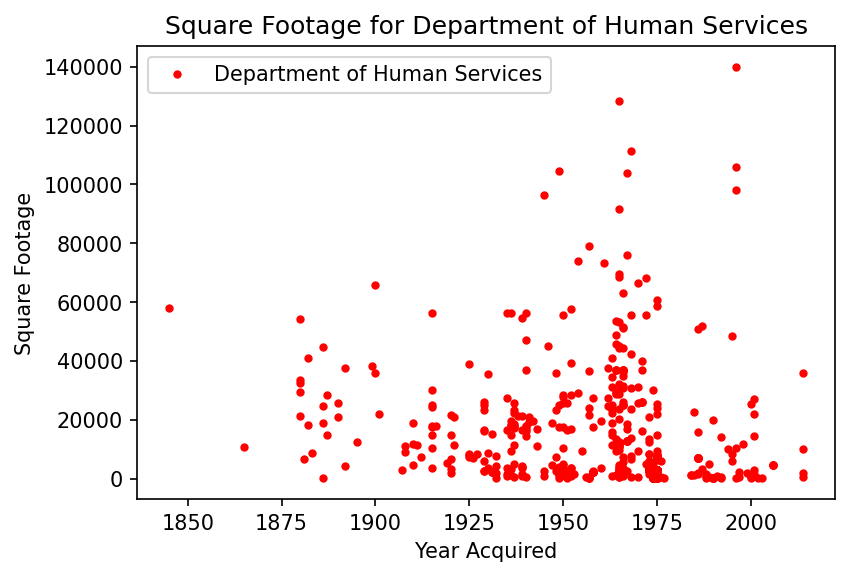

In [392]:
plt.figure(dpi=150)
plt.plot(agency_new4["Year Acquired"],agency_new4["Square Footage"],'.',color='red',label ="Department of Human Services")

plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.title("Square Footage for Department of Human Services")
plt.legend()
plt.show()

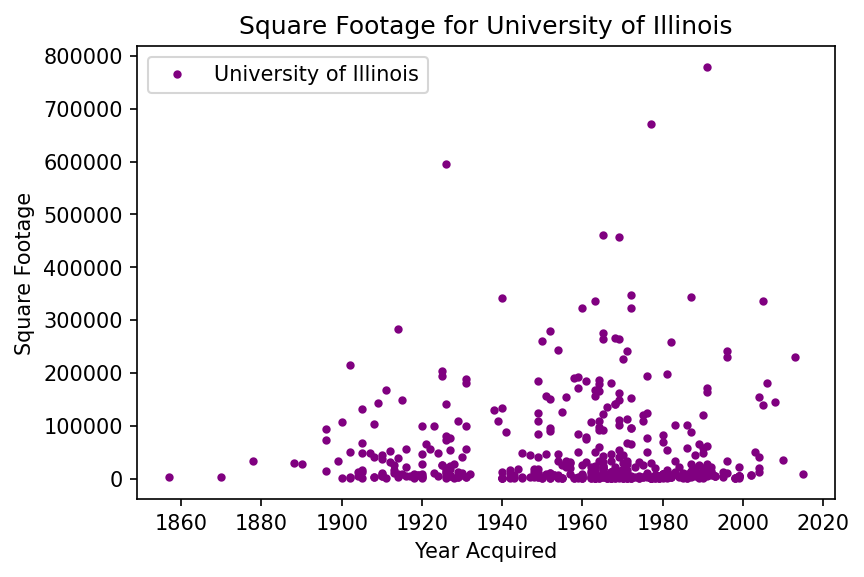

In [389]:
plt.figure(dpi=150)
plt.plot(agency_new5["Year Acquired"],agency_new5["Square Footage"],'.',color='purple',label ="University of Illinois")

plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.title("Square Footage for University of Illinois")
plt.legend()
plt.show()